In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Skill count VS Median Salary for Top 10 Skills for Data Analyst Jobs

In [3]:
df = df[df['job_title_short'] == "Data Analyst"]

In [5]:
df_explode = df.explode('job_skills')

In [25]:
df_final = df_explode.groupby(['job_skills']).agg(
    skill_counts = ('job_skills', 'count'),
    median_year_salary = ('salary_year_avg', 'median')
)
df_final = df_final.sort_values(by = 'skill_counts', ascending=False).head(10)
df_final

,skill_counts,median_year_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


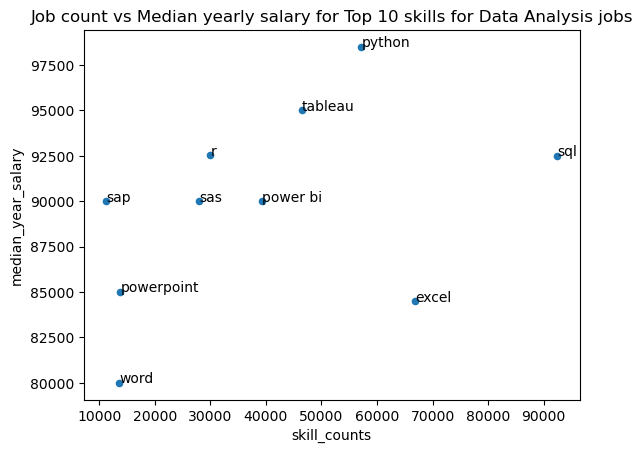

In [27]:
df_final.plot(kind = 'scatter', x = 'skill_counts', y = 'median_year_salary')
plt.title('Job count vs Median yearly salary for Top 10 skills for Data Analysis jobs')
for i, txt in enumerate(df_final.index):
    plt.text(df_final['skill_counts'].iloc[i], df_final['median_year_salary'].iloc[i],txt)
                                   # get the coordinate by using .iloc[]
